# <center>Spring Mass System</center>

<center><img src="SpringMassSystem.jpg" width="300" height="300" align="center"/><center>


The spring-mass system is a simple experiment: a mass $m$ is suspended by a spring with Hooke's constant $k$. If the mass is perturbed or taken from equilibrium in the $y$-direction only with a displacement of $y(t)$, we know that the governing equation simply starts from Newton's second law as follows:

$$
{\bf{F}} = m {\bf{a}}
$$


## $\color{Blue}{\text{Equation of Motion}}$

It's known that the force ${\bf{F}}$ is the Hooke's force pointing upwards, opposite to the spring's motion, and the acceleration ${\bf{a}}$ is the second derivative of the displacement $y(t)$. Therefore, one can write:

$$
{\bf{F}} = m {\bf{a}} \quad \quad \Longrightarrow \quad \quad -k y(t) = m \frac{d^2y(t)}{dt^2}  \quad \quad \Longrightarrow \quad \quad \frac{d^2y(t)}{dt^2} = -\frac{k}{m}y(t) 
$$

Assuming that $\frac{k}{m}=\omega^2$ which represents the natural frequency of the motion, then the above equations can be written as:

$$
\frac{d^2y(t)}{dt^2}=- \omega^2y(t)  \quad \quad \Longrightarrow \quad \quad \frac{d^2y(t)}{dt^2} + \omega^2y(t) =0
$$


## $\color{Blue}{\text{Analytical Solution}}$

This is a homogeneous second-order ordinary differential equation. To solve it analytically, we first get the auxiliary equation which is $\lambda^2+\omega^2=0$. The solutions of this equation are complex values, i.e., $\lambda = \alpha \pm i \beta = 0 \pm i \omega$. Therefore, the general solution would take the form of:

$$
y(t) = e^{\alpha t} \left[ A \cos{(\omega t)} + B \sin{(\omega t)}\right]
$$

As a result, one can write the general solution of this system as:

$$
y(t) = A \cos{(\omega t)} + B \sin{(\omega t)}
$$

It can be seen that this is an oscillating solution, and since the system given in this example is an undamped system, this motion goes on without stopping and without decreasing the amplitude of the motion.


Let's solve this equation. Assuming that the natural frequency is $\omega = 4$, then to identify the constants $A$ and $B$, we need initial conditions. 
Let's assume that the position at $t=0$ is $y(0)=\frac{3}{2}$ and the velocity at $t=0$ is $\acute{y}(0)=-3$. Applying this to the solution gives the following:

$$
y(0) = \frac{3}{2} = A \cos{(\omega (0))} + B \sin{(\omega (0))} \quad \quad \Longrightarrow \quad \quad A =  \frac{3}{2}
$$

$$
\acute{y}(0)=-3 = -A\omega\sin{(\omega (0))}+B\omega\cos{(\omega (0))} \quad \quad \Longrightarrow \quad \quad B = -\frac{3}{4}
$$

As a result, the analytical solution is as follows:

$$
y(t) =  \frac{3}{2}\cos{(4 t)} -\frac{3}{4} \sin{(4 t)}
$$


Let's visualise it!

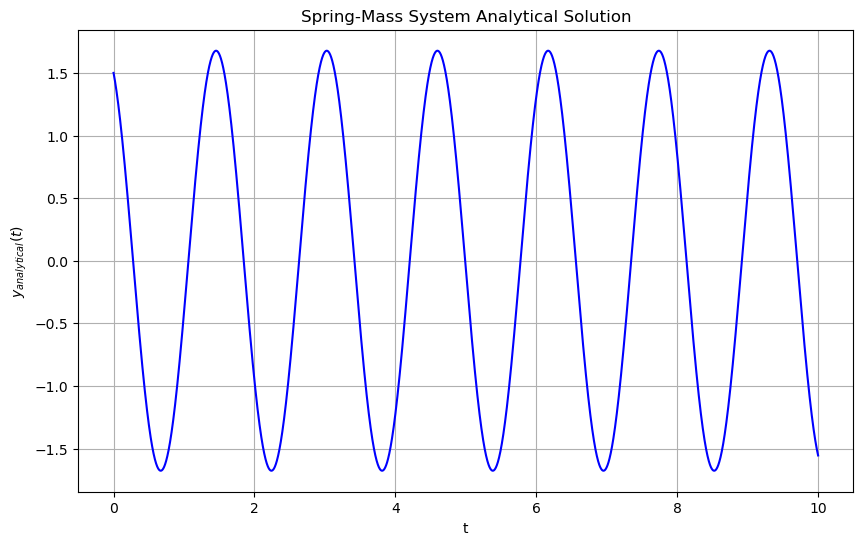

In [169]:
#importing all required libraries
import numpy as np
import matplotlib.pyplot as plt

#Define the constants
A = 3/2
B = -3/4

#Define the natural frequency
omega = 4

#Define the equation of the analytical solution
y_anal = A*(np.cos(omega*t))+B*(np.sin(omega*t))

#create a time vector
t_max = 10.0 #maximum time
t = np.linspace(0, t_max, num=6000)

#visualise the output
plt.figure(figsize = (10, 6))
plt.plot(t, y_anal, 'b')
plt.title('Spring-Mass System Analytical Solution')
plt.xlabel('t')
plt.ylabel('$y_{analytical}(t)$')
plt.grid()
plt.show()

## $\color{Blue}{\text{Numerical Solution}}$

In mathematics and computational science, the Euler method (also called the forward Euler method) is a first-order numerical procedure for solving ordinary differential equations (ODEs) with a given initial value.

Let 

$$\frac{dS(t)}{dt}=F(t,S(t))$$

be an explicitly defined first order ODE. That is, $F$ is a function that returns the derivative, or change, of a state given a time and state value. Also, let $t$ be a numerical grid of the interval $[t_0,t_{max}]$ with spacing $h$. Without loss of generality, we assume that $t_0=0$, and that $t_{max}=N\times h$ for some positive integer, $N$.

The linear approximation of $S(t)$ around $t_j$ at $t_{j+1}$ is:

$$
S(t_{j+1})=S(t_j)+[(t_j+1)−(t_j)]\frac{dS(t_j)}{dt}
$$

which can also be written

$$
S(t_{j+1})=S(t_j)++hF(t_j,S(t_j))
$$

This formula is called the **Explicit Euler Formula**, and it allows us to compute an approximation for the state at $S(t_{j+1})$ given the state at $S(t_j)$. Starting from a given initial value of $S_0=S(t_0)$, we can use this formula to integrate the states up to $S(t_{max})$; these $S(t)$ values are then an approximation for the solution of the differential equation. The Explicit Euler formula is the simplest and most intuitive method for solving initial value problems. At any state $(t_j,S(t_j))$ it uses $F$ at that state to “point” toward the next state and then moves in that direction a distance of $h$.


For the spring-mass system, the ODE is given by:

$$
\frac{d^2y(t)}{dt^2}=- \omega^2y(t)
$$

which is a second-order ODE. It can also be written as:

$$
\frac{dv(t)}{dt}=- \omega^2y(t)
$$

where $v$ is the velocity of the oscillating mass and using the facts that:

$$
\frac{d^2y(t)}{dt^2}=\frac{dv(t)}{dt} \quad \quad \quad \text{,}  \quad \quad \quad v(t) = \frac{dy(t)}{dt} 
$$

To make use of the Euler method, we can re-write this as two coupled first order ordinary differential equations as follows:

$$
\frac{dv(t)}{dt}=−\omega^2 y(t) \quad \quad \quad \text{and} \quad \quad \quad \frac{dy(t)}{dt}=v(t)
$$

We can then solve each of these equations using the Euler method. Implementing the iterative algorithm on both equations gives the following:

$$
v_{j+1}=v_j-[(t_{j+1})−(t_j)]\omega^2 y_j  \quad \quad \quad \text{and} \quad \quad \quad y_{j+1}=y_j+[(t_{j+1})−(t_j)] v_j 
$$


To solve this equation numerically, we still need to specify the initial position, $y_0$, and velocity, $v_0$.

Let's borrow the values we used for the analytical solution where the following values were chosen:

$$
y_0 = \frac{3}{2} \quad \quad \quad \acute{y}_0 =v_0= -3
$$

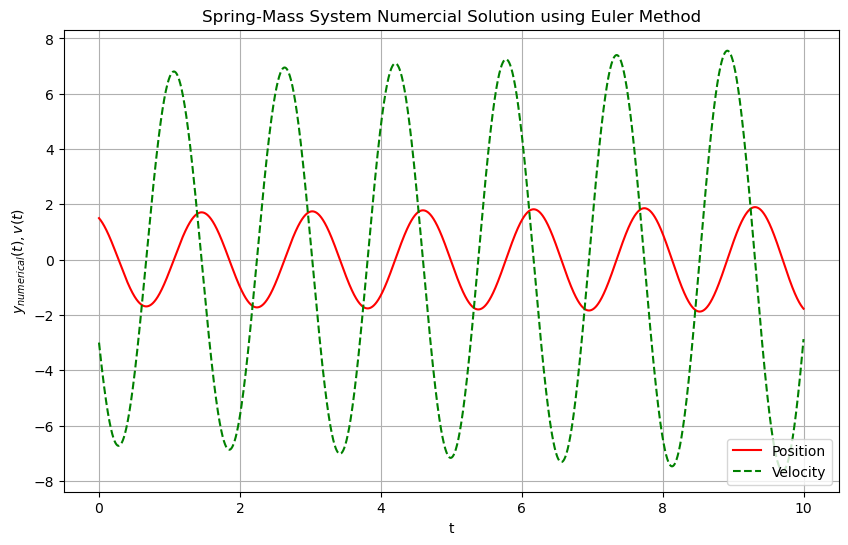

In [171]:
#importing all required libraries
import numpy as np
import matplotlib.pyplot as plt

#Set the number of the algorithm iterations to be used in the for loop
no_of_iterations=6000

# set time step so that the loop will always iterate until t=t_max seconds 
dt = t_max/no_of_iterations #(t+dt)-t

# make arrays to store data: vectors of zero elements with the size of the iterations number
t = np.zeros(no_of_iterations) 
y_num = np.zeros(no_of_iterations)
v = np.zeros(no_of_iterations)

# set initial conditions at t=0
t[0] = 0 #time
y_num[0] = 3/2 #position
v[0] = -3 #velocity

# evolve and solve using Euler Method
for i in range(1,no_of_iterations):
    t[i] = dt * i #compute the current time 
    v[i] = v[i-1] - dt *omega**2*y[i-1] #compute the velocity at the current time
    y_num[i] = y[i-1] + dt * v[i-1] #comput the position at the current time

#visualise the output
plt.figure(figsize = (10, 6))
plt.plot(t, y_num, 'r', label='Position')
plt.plot(t, v, 'g--', label='Velocity')
plt.title('Spring-Mass System Numercial Solution using Euler Method')
plt.xlabel('t')
plt.ylabel('$y_{numerical}(t),v(t)$')
plt.grid()
plt.legend(loc='lower right')
plt.show()


## $\color{Blue}{\text{Comparison Between the Analytical \& Numerical Solutions}}$

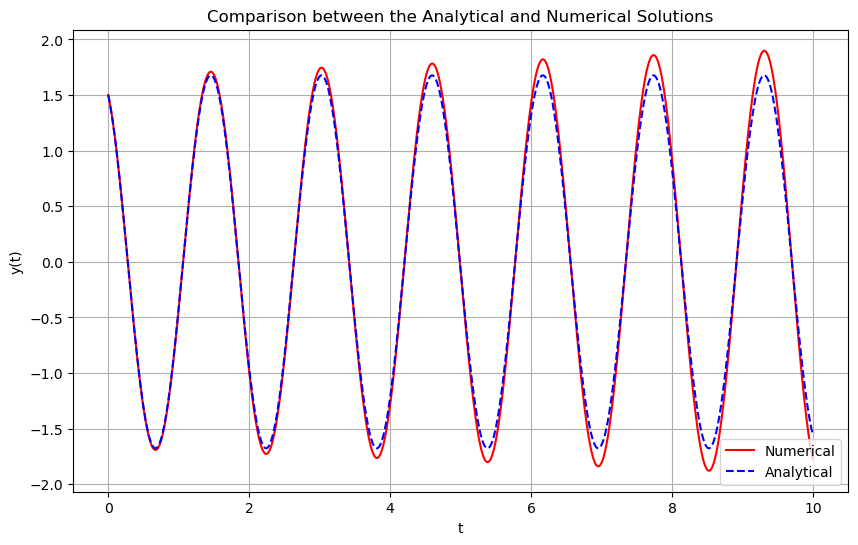

In [173]:
#visulaise both solutions in the same figure
plt.figure(figsize = (10, 6))
plt.plot(t, y_num, 'r', label='Numerical')
plt.plot(t, y_anal, 'b--', label='Analytical')
plt.title('Comparison between the Analytical and Numerical Solutions')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()


## $\color{Blue}{\text{Error Estimation}}$

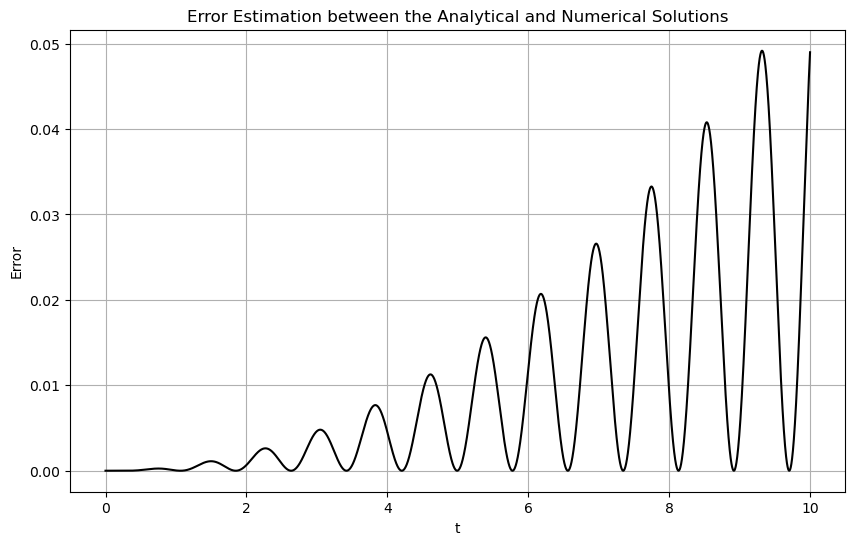

In [177]:
# Calculation of Mean Squared Error (MSE) 

#initialise the error vector
MSE = np.zeros(len(y_num))

#calculate the MSE between both solutions at each time point
for j in range(len(y_num)):
    MSE[j] = np.mean((y_anal[j]-y_num[j])**2) 

#visualise the output
plt.figure(figsize = (10, 6))
plt.plot(t,MSE, 'k')
plt.title('Error Estimation between the Analytical and Numerical Solutions')
plt.xlabel('t')
plt.ylabel('Error')
plt.grid()
plt.show()
